# Содиков Фарход, ПИ19-1, ML1.2
## Задания для выполнения.
### 1. Ваша задача - построить предиктивную модель предсказания целевой переменной в зависимости от значения нескольких факторов (признаков).

In [129]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error, mean_absolute_error

### 2.Загрузите датасет отсюда. Вам понадобится два файла - отдельно с признаками (помечен x) и значениями целевой переменной (помечен y). Файлы не содержат заголовков столбцов и строк.

In [130]:
x_dataset = pd.read_csv('./data/19_x.csv', names = ['x1','x2','x3'], header = None)
y_dataset = pd.read_csv('./data/19_y.csv', names = ['Y'], header = None)

### 3. Сделайте количественное описание датасета.

In [131]:
print(f'''
Shape of X: {x_dataset.shape} 
Shape of Y: {y_dataset.shape}

Describe of X:
{x_dataset.describe()}

Describe of Y:
{y_dataset.describe()}

Corr of X:
{x_dataset.corr()}
''')



Shape of X: (70, 3) 
Shape of Y: (70, 1)

Describe of X:
              x1         x2         x3
count  70.000000  70.000000  70.000000
mean    0.083273  -0.111627   0.002190
std     1.060233   0.980703   0.840765
min    -2.606880  -2.129910  -1.896352
25%    -0.600220  -0.936378  -0.429161
50%     0.128845  -0.049244   0.003797
75%     0.611285   0.543912   0.556886
max     3.483627   1.902446   2.503449

Describe of Y:
                Y
count   70.000000
mean     2.788599
std     47.560602
min   -117.088327
25%    -30.715606
50%      0.333113
75%     25.953389
max    121.263402

Corr of X:
          x1        x2        x3
x1  1.000000  0.214792  0.038904
x2  0.214792  1.000000  0.018413
x3  0.038904  0.018413  1.000000



In [132]:
reg = linear_model.LinearRegression() #create model
reg.fit(x_dataset, y_dataset) #fit()

LinearRegression()

In [133]:
print(f'''Coef: {reg.coef_}

Intercept: {reg.intercept_}

Prediction: {reg.predict(x_dataset.iloc[0:5])}

Iloc: {y_dataset.iloc[0:5]}''')


Coef: [[41.88849166  0.50737491 13.27827397]]

Intercept: [-0.67202679]

Prediction: [[ 2.01810448e+01]
 [ 2.50125286e+01]
 [-4.09094992e+01]
 [-6.84657012e-04]
 [ 8.96296107e+01]]

Iloc:            Y
0  12.847083
1  32.599461
2 -64.148684
3  -4.926700
4  76.160027


### 4. Разделите все наблюдения на обучающую и тестовую выборки в соотношении 80-20.

In [134]:
x_train, x_test, y_train, y_test = train_test_split(x_dataset, y_dataset, test_size=0.2, random_state=123)

In [135]:
x_dataset.head()

,x1,x2,x3
0,0.849343,0.317037,-1.121040
1,0.452329,0.386385,0.492619
2,-0.971847,0.597311,0.012704
3,0.065406,-0.364863,-0.141833
4,1.937645,0.002707,0.687983


In [136]:
x_train.shape, y_train.shape

((56, 3), (56, 1))

In [137]:
x_test.shape, y_test.shape

((14, 3), (14, 1))

### 5. Для целевой и каждого из признаков постройте парную регрессионную модель. Визуализируйте линию регрессии и исходные данные на графике. При помощи коэффициентов оцените силу связи.


In [190]:
r2 = []
mse = []

In [139]:
X1 = x_train[['x1']].values
Y = y_train[['Y']].values
X1_test = x_test[['x1']].values
Y_test = y_test[['Y']].values

x_f = x_dataset[['x1']].values
y_f = y_dataset[['Y']].values

#### y = a * x + b; а - slope, b - intercept

Slope: 42.44799744232766
Intercept: -0.4697691494498255
R^2 score for X1:  0.8679449927714634   0.8679449927714634
Mean squared error:  168.050838442723


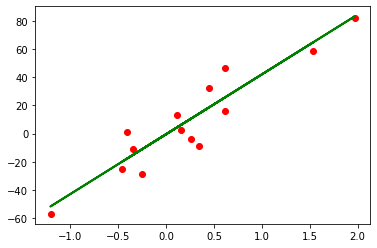

In [140]:
slr = LinearRegression()
slr.fit(X1, Y)
y_pred1 = slr.predict(X1_test)


plt.scatter(X1_test, Y_test, color = 'r')
plt.plot(X1_test, y_pred1, color = 'g', linewidth=2)
plt.show
r2.append(slr.score(X1_test,Y_test))
mse.append(mean_squared_error(Y_test, y_pred1))
print('Slope:',slr.coef_[0][0])
print('Intercept:',slr.intercept_[0])
print('R^2 score for X1: ', slr.score(X1_test,Y_test), ' ', r2_score(Y_test,y_pred1))
print('Mean squared error: ', mean_squared_error(Y_test, y_pred1))

Slope: 7.674009935027178
Intercept: 2.385259637618513
R^2 score for X1:  0.1699394165692083
Mean squared error:  1056.3202405675731


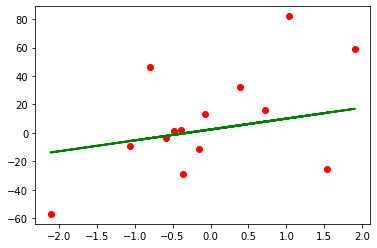

In [141]:
X2 = x_train[['x2']].values
X2_test = x_test[['x2']].values
y_pred2 = slr.predict(X2_test)

slr = LinearRegression()
slr.fit(X2, Y)
y_pred2 = slr.predict(X2_test)
r2.append(slr.score(X2_test, Y_test))

plt.scatter(X2_test, Y_test, color = 'r')
plt.plot(X2_test, slr.predict(X2_test), color = 'g', linewidth = 2)
plt.show

mse.append(mean_squared_error(Y_test, y_pred2))
print('Slope:',slr.coef_[0][0])
print('Intercept:',slr.intercept_[0])
print('R^2 score for X1: ', slr.score(X2_test,Y_test))
print('Mean squared error: ', mean_squared_error(Y_test, y_pred2))

Slope: 16.0206581225697
Intercept: 2.150131633075952
R^2 score for X1:  -0.006114696688994448
Mean squared error:  1280.363553769086


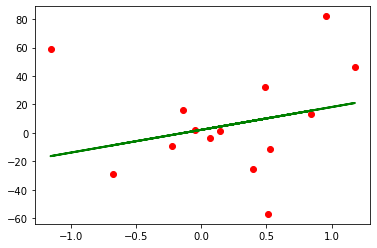

In [142]:
X3 = x_train[['x3']].values
X3_test = x_test[['x3']].values
y_pred3 = slr.predict(X3_test)

slr = LinearRegression()
slr.fit(X3, Y)
y_pred3 = slr.predict(X3_test)
r2.append(slr.score(X3_test,Y_test))

plt.scatter(X3_test, Y_test, color = 'r')
plt.plot(X3_test, slr.predict(X3_test), color = 'g', linewidth = 2)
plt.show

mse.append(mean_squared_error(Y_test, y_pred3))
print('Slope:',slr.coef_[0][0])
print('Intercept:',slr.intercept_[0])
print('R^2 score for X1: ', slr.score(X3_test,Y_test))
print('Mean squared error: ', mean_squared_error(Y_test, y_pred3))

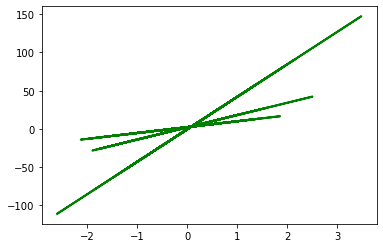

In [143]:
# all lines
X =[0,0,0,0,0,0]
for i in range(1,4):
    X[i] = x_train[[f'x{i}']].values
    
    slr = LinearRegression()
    slr.fit(X[i], Y)
    y_pred1 = slr.predict(X[i])

    plt.plot(X[i], slr.predict(X[i]), color='g', linewidth = 2)
    plt.show

#### Method 'r2_score' - Return the coefficient of determination R^2 of the prediction.

In [144]:
for i in range(3):
    print(f'R^2 score for X{i+1}: ', r2[i])

R^2 score for X1:  0.8679449927714634
R^2 score for X2:  0.1699394165692083
R^2 score for X3:  -0.006114696688994448


### 6. Постройте модель множественной линейной регрессии целевой переменной от всех показателей. Оцените качество регрессии, сделайте вывод.

In [145]:
x_train.count(axis = 0)

x1    56
x2    56
x3    56
dtype: int64

In [146]:
x_test.count(axis = 0)

x1    14
x2    14
x3    14
dtype: int64

In [147]:
lm = LinearRegression()

In [148]:
x_train.head()

,x1,x2,x3
24,0.214472,0.883814,-0.396336
59,-0.137075,-1.340306,-0.292585
60,1.101011,1.858947,-1.119612
56,-0.207828,1.773157,0.306821
29,1.383678,0.124525,-0.005110


In [149]:
y_train.head()

,Y
24,10.290008
59,-18.516920
60,19.442460
56,-1.982012
29,70.097225


In [150]:
feature_cols = ['x1', 'x2', 'x3']
lm = LinearRegression()
lm.fit(x_train,y_train)


LinearRegression()

In [151]:
# all x
print (f'Intercept : {lm.intercept_[0]}')
coef = lm.coef_[0]
print(f'\nSlope:')
for i,j in zip(feature_cols,coef):
    print(i,'= ', j)
y_pred=lm.predict(x_test)
print(f'R^2: ',r2_score(y_test, y_pred))   

Intercept : 0.21818253879160054

Slope:
x1 =  41.96460237908957
x2 =  0.036707280812841796
x3 =  13.664682538101657
R^2:  0.8990151377285438


In [152]:
# all without negative x2 in linear regression.
x_t=pd.read_csv('./data/19_x.csv', names = ['x1','x2','x3'], header = None)
y_t = pd.read_csv('./data/19_y.csv',names = ['Y'], header = None)

x_t.drop(['x2'], axis = 'columns', inplace = True)
x_t

,x1,x3
0,0.849343,-1.121040
1,0.452329,0.492619
2,-0.971847,0.012704
3,0.065406,-0.141833
4,1.937645,0.687983
...,...,...
65,1.415500,-0.426184
66,-1.857439,0.627265
67,-1.206632,0.508770
68,-0.343812,0.530620


In [153]:
train_x, test_x, train_y, test_y = train_test_split(x_t, y_t, test_size = 0.2, random_state = 123)

feature_cols = ['x1', 'x3'] #without x2
lm = LinearRegression()
lm.fit(train_x, train_y)

print (f'Intercept : {lm.intercept_[0]}')
coef = lm.coef_[0]
print(f'\nSlope:')
for i,j in zip(feature_cols, coef):
    print(i,'= ', j)
y_pred=lm.predict(test_x)
print(f'R^2: ', r2_score(test_y, y_pred))   


Intercept : 0.2132626137700031

Slope:
x1 =  41.96902848892689
x3 =  13.666956625308591
R^2:  0.8988907298688288


## Дополнительные задания.

### 1. Для целевой переменной и каждого из признаков постройте полиномиальную регрессию второго, третьего и десятого порядков. Сделайте вывод о значимости регрессии.


In [162]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline


In [163]:
r2_10 =[]

#### Полиномиальная регрессия 2 порядка для X1.

In [164]:
X1 = x_train[['x1']].values
Y = y_train[['Y']].values
X1_test = x_test[['x1']].values
Y_test = y_test[['Y']].values

X2 = x_train[['x2']].values
X2_test = x_test[['x2']].values

X3 = x_train[['x3']].values
X3_test = x_test[['x3']].values

In [165]:
X1_test.shape, Y_test.shape

((14, 1), (14, 1))

In [166]:
poly_reg = PolynomialFeatures(degree = 2) #2
X_pol_train = poly_reg.fit_transform(X1) #X1
X_pol_test = poly_reg.fit_transform(X1_test)

pol_reg = LinearRegression()
test=pol_reg.fit(X_pol_train, Y)
Y_pred = pol_reg.predict(X_pol_test)

print(f'''
{pol_reg.coef_}

Coefficient of determination: {pol_reg.score(X_pol_test, Y_test)}
Mean squared error: {mean_squared_error(Y_test, Y_pred)}
''')


[[ 0.         42.61448756 -0.36316129]]

Coefficient of determination: 0.867639911910628
Mean squared error: 168.4390788853402



#### Полиномиальная регрессия 3 порядка для X1.

In [167]:
poly_reg = PolynomialFeatures(degree = 3) #3
X_pol_train = poly_reg.fit_transform(X1) #X1
X_pol_test = poly_reg.fit_transform(X1_test)


pol_reg = LinearRegression()
test=pol_reg.fit(X_pol_train, Y)
Y_pred = pol_reg.predict(X_pol_test)


print(f'''
{pol_reg.coef_}

Coefficient of determination: {pol_reg.score(X_pol_test, Y_test)}
Mean squared error: {mean_squared_error(Y_test, Y_pred)}
''')



[[ 0.         45.96855832  0.85549969 -0.90756654]]

Coefficient of determination: 0.8646919857898858
Mean squared error: 172.19055689935118



#### Полиномиальная регрессия 10 порядка для X1.

In [168]:
poly_reg = PolynomialFeatures(degree = 10) #10
X_pol_train = poly_reg.fit_transform(X1) #X1
X_pol_test = poly_reg.fit_transform(X1_test)


pol_reg = LinearRegression()
test=pol_reg.fit(X_pol_train, Y)
Y_pred = pol_reg.predict(X_pol_test)

mse.append(mean_squared_error(Y_test, Y_pred))
r2_10.append(pol_reg.score(X_pol_test,Y_test))

print(f'''
{pol_reg.coef_}

Coefficient of determination: {pol_reg.score(X_pol_test, Y_test)}
Mean squared error: {mean_squared_error(Y_test, Y_pred)}
''')



[[  0.          43.08747077 -36.79960418  -2.52313047  51.50052548
    5.40805462 -23.64123312  -2.53722024   4.38105759   0.30362435
   -0.26499597]]

Coefficient of determination: 0.8385285102189541
Mean squared error: 205.48572759031646



#### Полиномиальная регрессия 2 порядка для X2.

In [170]:
poly_reg = PolynomialFeatures(degree = 2) #2
X_pol_train = poly_reg.fit_transform(X2) #x2
X_pol_test = poly_reg.fit_transform(X2_test)


pol_reg = LinearRegression()
test=pol_reg.fit(X_pol_train, Y)
Y_pred = pol_reg.predict(X_pol_test)

print(f'''
{pol_reg.coef_}

Coefficient of determination: {pol_reg.score(X_pol_test, Y_test)}
Mean squared error: {mean_squared_error(Y_test, Y_pred)}
''')



[[0.         8.38908337 2.58444172]]

Coefficient of determination: 0.1432010402151601
Mean squared error: 1090.3470197045315



#### Полиномиальная регрессия 3 порядка для X2.

In [171]:
poly_reg = PolynomialFeatures(degree = 3) #3
X_pol_train = poly_reg.fit_transform(X2) #x2
X_pol_test = poly_reg.fit_transform(X2_test)


pol_reg = LinearRegression()
test = pol_reg.fit(X_pol_train, Y)
Y_pred = pol_reg.predict(X_pol_test)

print(f'''
{pol_reg.coef_}

Coefficient of determination: {pol_reg.score(X_pol_test, Y_test)}
Mean squared error: {mean_squared_error(Y_test, Y_pred)}
''')



[[ 0.         16.10265407  1.40440084 -3.80171661]]

Coefficient of determination: 0.011643448650545563
Mean squared error: 1257.764855876981



#### Полиномиальная регрессия 10 порядка для X2.

In [172]:
poly_reg = PolynomialFeatures(degree = 10) #10
X_pol_train = poly_reg.fit_transform(X2) #x2
X_pol_test = poly_reg.fit_transform(X2_test)

pol_reg = LinearRegression()
test = pol_reg.fit(X_pol_train, Y)
Y_pred = pol_reg.predict(X_pol_test)

mse.append(mean_squared_error(Y_test, Y_pred))
r2_10.append(pol_reg.score(X_pol_test, Y_test))

print(f'''
{pol_reg.coef_}

Coefficient of determination: {pol_reg.score(X_pol_test, Y_test)}
Mean squared error: {mean_squared_error(Y_test, Y_pred)}
''')


[[ 0.00000000e+00  7.59188378e+01  8.75550688e-02 -2.50580359e+02
  -1.32996740e+01  2.51357130e+02  2.95251411e+01 -9.12963764e+01
  -1.61727615e+01  1.09614730e+01  2.54418318e+00]]

Coefficient of determination: -0.2456344919459057
Mean squared error: 1585.1721578600568



#### Полиномиальная регрессия 2 порядка для X3.

In [173]:
poly_reg = PolynomialFeatures(degree = 2) #2
X_pol_train = poly_reg.fit_transform(X3) #x3
X_pol_test = poly_reg.fit_transform(X3_test)


pol_reg = LinearRegression()
test=pol_reg.fit(X_pol_train, Y)
Y_pred = pol_reg.predict(X_pol_test)

print(f'''
{pol_reg.coef_}

Coefficient of determination: {pol_reg.score(X_pol_test, Y_test)}
Mean squared error: {mean_squared_error(Y_test, Y_pred)}
''')


[[ 0.         15.57237111  9.24348933]]

Coefficient of determination: 0.10541875184217231
Mean squared error: 1138.4280835931356



#### Полиномиальная регрессия 3 порядка для X3.

In [175]:
poly_reg = PolynomialFeatures(degree = 3) #3
X_pol_train = poly_reg.fit_transform(X3) #x3
X_pol_test = poly_reg.fit_transform(X3_test)


pol_reg = LinearRegression()
test = pol_reg.fit(X_pol_train, Y)
Y_pred = pol_reg.predict(X_pol_test)

print(f'''
{pol_reg.coef_}

Coefficient of determination: {pol_reg.score(X_pol_test, Y_test)}
Mean squared error: {mean_squared_error(Y_test, Y_pred)}
''')


[[ 0.         11.46467517  8.36270685  1.6637616 ]]

Coefficient of determination: 0.10026574129656662
Mean squared error: 1144.9857125756896



#### Полиномиальная регрессия 10 порядка для X3.

In [177]:
poly_reg = PolynomialFeatures(degree = 10) #10
X_pol_train = poly_reg.fit_transform(X3) #x3
X_pol_test = poly_reg.fit_transform(X3_test)

pol_reg = LinearRegression()
test = pol_reg.fit(X_pol_train, Y)
Y_pred = pol_reg.predict(X_pol_test)

mse.append(mean_squared_error(Y_test, Y_pred))
r2_10.append(pol_reg.score(X_pol_test, Y_test))

print(f'''
{pol_reg.coef_}

Coefficient of determination: {pol_reg.score(X_pol_test, Y_test)}
Mean squared error: {mean_squared_error(Y_test, Y_pred)}
''')


[[   0.           40.75600563  -60.03961086  -92.51203327  314.87158239
    80.05052082 -308.45884482  -33.36183488  104.5170005     6.0445364
   -11.01518598]]

Coefficient of determination: 0.3476959344329752
Mean squared error: 830.1104777376966



### 2.Постройте сводную таблицу показателей точности всех построенных моделей по тестовой и обучающей выборке. Сделайте вывод, какие модели переобученнные, какие - недообученные.


In [178]:
r2_10

[0.8385285102189541,
 -0.2456344919459057,
 0.3476959344329752,
 0.3476959344329752]

In [188]:
print('R^2 for simple linear regression  R^2 for Polynomial Regression (degree = 10) ')
for i in range(3):
    print(f'R^2 score for X{i+1}: ','      ', '{:6.5f}'.format(r2[i]),'                              ','{:6.5f}'.format(r2_10[i]))
print('')
print('MSE for simple linear regression  MSE for Polynomial Regression (degree = 10) ')
for i in range(3):
    print(f'MSE score for X{i+1}: ','      ', '{:6.2f}'.format(mse[i]),'                              ','{:12.2f}'.format(mse[i+5]))
  

R^2 for simple linear regression  R^2 for Polynomial Regression (degree = 10) 
R^2 score for X1:         0.86794                                0.83853
R^2 score for X2:         0.16994                                -0.24563
R^2 score for X3:         -0.00611                                0.34770

MSE for simple linear regression  MSE for Polynomial Regression (degree = 10) 
MSE score for X1:         168.05                                      205.49
MSE score for X2:         1056.32                                     1585.17
MSE score for X3:         1280.36                                      830.11
